# Forschungsdaten der  Berlin-Brandenburgischen Akademie der Wissenschaften

<a id="0"></a>
## Inhalt

1. [Statistische Beschreibung des Datensatzes](#1)

2. [Univariate Plots](#2)

3. [Word Clouds](#3)




<a id="1"></a>
## 1 Statistische Beschreibung des Datensatzes

[Zurück zum Anfang](#0)

In [2]:
# Importieren der Bibliotheken
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [3]:

# Erstellen des 1. Dataframes (zeilenweise)
data_bbaw = pd.read_csv(r'../../data/refined/clarin/bbaw/bbaw-records-20240620_refined.csv',
dtype=str,  # Datentyp auf String setzen
low_memory=False)  # Speicheroptimierung ausschalten


# Erstellen des 2. Dataframes (recordweise gruppiert)
# Kopie des Dataframes erstellen, record identifier durch alle Zeilen füllen

data_bbaw_grouped = data_bbaw.copy()
data_bbaw_grouped['record id'] = data_bbaw_grouped['record id'].ffill()  # record id auffüllen


# Gruppieren und joinen der Daten nach record id
data_bbaw_grouped = data_bbaw_grouped.groupby('record id').agg({
    'datestamp': 'first', 
    'identifier': lambda x: '; '.join(x.dropna().unique()),
    'subject': lambda x: '; '.join(x.dropna().unique()),
    'title': lambda x: '; '.join(x.dropna().unique()),
    'publisher': lambda x: '; '.join(x.dropna().unique()),
    'date': lambda x: '; '.join(x.dropna().unique()),   
    'type': lambda x: '; '.join(x.dropna().unique()), 
    'language': lambda x: '; '.join(x.dropna().unique()),
    'source': lambda x: '; '.join(x.dropna().unique()),
    'rights': lambda x: '; '.join(x.dropna().unique()),
    'creator': lambda x: '; '.join(x.dropna().unique()), 
    'format': lambda x: '; '.join(x.dropna().unique()),  
    'format - mediatype': lambda x: '; '.join(x.dropna().unique()),  
    'format - subtype': lambda x: '; '.join(x.dropna().unique()),   
    'relation': lambda x: '; '.join(x.dropna().unique()),
    'contributor': lambda x: '; '.join(x.dropna().unique()),
    'description': lambda x: '; '.join(x.dropna().unique()),
    'coverage': lambda x: '; '.join(x.dropna().unique()),      
    'record id': 'first',  
}).reset_index(drop=True)

data_bbaw_grouped.fillna('NA', inplace=True)  # NaT durch NA ersetzen

data_bbaw_grouped[['date', 'datestamp']] = data_bbaw_grouped[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')
data_bbaw[['date', 'datestamp']] = data_bbaw[['date', 'datestamp']].apply(pd.to_datetime, errors='coerce')

data_bbaw_grouped.replace('','NA', inplace=True)  # Fehlende Werte mit NA ersetzen

                column count   type
15         contributor    26  valid
17            coverage    12  valid
10             creator  3622  valid
5                 date  4650  valid
0            datestamp  5854  valid
16         description    25  valid
11              format   412  valid
12  format - mediatype   412  valid
13    format - subtype   401  valid
1           identifier  5853  valid
7             language  5831  valid
4            publisher  5854  valid
18           record id  5854  valid
14            relation    26  valid
9               rights  5830  valid
8               source  5831  valid
2              subject  5842  valid
3                title  5854  valid
6                 type  5846  valid


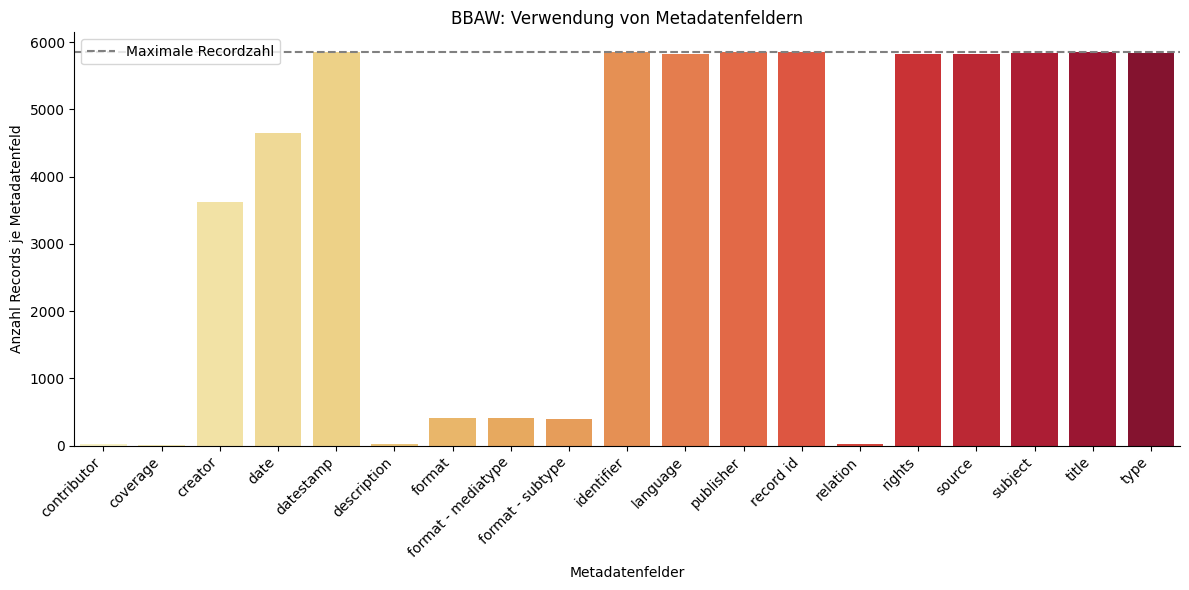

In [3]:
# Erstellen eines DataFrames zur Zusammenfassung der gültigen Einträge für jedes Metadatenfeld
metadata_usage = pd.DataFrame(columns=['column', 'count', 'type'])

# Verwendung des gruppierten Dataframes
for column in data_bbaw_grouped.columns:
    # Zählen gültiger Werte
    valid_count = data_bbaw_grouped[column][data_bbaw_grouped[column] != 'NA'].count()

    # Erstellen eines temporären DataFrames
    valid_row = pd.DataFrame({'column': [column], 'count': [valid_count], 'type': ['valid']})

    # Verkettung der Zeilen
    metadata_usage = pd.concat([metadata_usage, valid_row], ignore_index=True)

metadata_usage = metadata_usage.sort_values(by='column')

# Ausgabe zur Prüfung von metadata_usage
print(metadata_usage)

# Berechnen der maximalen Anzahl der Records mit 'record id'
max_record_count = data_bbaw_grouped['record id'].nunique()


sns.catplot(data=metadata_usage, x='column', y='count', kind='bar', height=6, aspect=2, hue='column', palette ='YlOrRd')


# Zeichnen einer horizontalen Linie bei der maximalen Datensatzanzahl
plt.axhline(y=max_record_count, color='grey', linestyle='--', label='Maximale Recordzahl')

# Plot-Beschriftungen und Titel anpassen
plt.xticks(rotation=45, ha='right')
plt.xlabel('Metadatenfelder')
plt.ylabel('Anzahl Records je Metadatenfeld')
plt.title('BBAW: Verwendung von Metadatenfeldern')
plt.legend()
plt.tight_layout()
plt.savefig("BBAW_Verwendung_von_Metadatenfeldern.png", dpi=600)

plt.show()




In [4]:
YlOrBr_palette = sns.color_palette('YlOrBr', 8, as_cmap=False)
YlOrBr_hex = YlOrBr_palette.as_hex()
print(YlOrBr_hex)
sns.color_palette('YlOrRd', 8)

['#fff8c1', '#fee89b', '#fece65', '#fead3a', '#f6861f', '#e1640e', '#c04602', '#933204']


[(1.0, 0.9379930795847751, 0.6484275278738947),
 (0.9970319108035371, 0.8700499807766243, 0.5027912341407151),
 (0.996078431372549, 0.7490196078431373, 0.35294117647058826),
 (0.9939407920030757, 0.6189465590157632, 0.26383698577470205),
 (0.9903729334871204, 0.4405536332179931, 0.2031833910034602),
 (0.9555555555555556, 0.23790849673202616, 0.14640522875816994),
 (0.8539638600538254, 0.07717031910803537, 0.11933871587850826),
 (0.7120953479430988, 0.0, 0.14901960784313725)]

In [5]:
data_bbaw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17723 entries, 0 to 17722
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   datestamp                  5854 non-null   datetime64[ns, UTC]
 1   identifier                 17500 non-null  object             
 2   subject                    10218 non-null  object             
 3   title                      5854 non-null   object             
 4   publisher                  5854 non-null   object             
 5   date                       4650 non-null   datetime64[ns, UTC]
 6   type                       5846 non-null   object             
 7   language                   5831 non-null   object             
 8   source                     5831 non-null   object             
 9   rights                     5830 non-null   object             
 10  creator                    3622 non-null   object             
 11  fo

In [6]:
data_bbaw.head()

,datestamp,identifier,subject,title,publisher,date,type,language,source,rights,creator,format,format - mediatype,format - subtype,relation,contributor,description,coverage,record id,record - header - setSpec
0,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-3175-D,webservice,SynCoP - Dependency Parser,Digitales Wörterbuch der deutschen Sprache,2016-07-29 15:34:22+00:00,text,NaN,NaN,NaN,"Didakowski, Jörg",NaN,NaN,NaN,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,NaN,WebLichtWebServices:1,WebLichtWebServices
1,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-3188-7,NaN,WebLichtWebServices,WebLichtWebServices,2014-01-20 15:36:36+00:00,NaN,NaN,NaN,NaN,WebLichtWebServices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WebLichtWebServices:10,WebLichtWebServices
2,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-3189-6,NaN,WebLichtWebServices,WebLichtWebServices,2014-01-20 15:36:40+00:00,NaN,NaN,NaN,NaN,WebLichtWebServices,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WebLichtWebServices:11,WebLichtWebServices
3,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-318C-3,webservice,dlexDB Types,Lexikalische Datenbank (dlexDB),2016-09-06 15:36:12+00:00,text,NaN,NaN,NaN,"Pohl, Edmund",NaN,NaN,NaN,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,NaN,WebLichtWebServices:12,WebLichtWebServices
4,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-318D-2,webservice,dlexDB Types: Frequency per million,Lexikalische Datenbank (dlexDB),2016-08-16 15:36:12+00:00,text,NaN,NaN,NaN,"Pohl, Edmund",NaN,NaN,NaN,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,NaN,WebLichtWebServices:13,WebLichtWebServices


In [7]:
data_bbaw.describe()

,datestamp,identifier,subject,title,publisher,date,type,language,source,rights,creator,format,format - mediatype,format - subtype,relation,contributor,description,coverage,record id,record - header - setSpec
count,5854,17500,10218,5854,5854,4650,5846,5831,5831,5830,3622,412,412,401,28,26,25,12,5854,5851
unique,NaN,17461,228,4225,9,NaN,1,1,5485,13,1401,7,2,2,7,11,4,7,5854,6
top,NaN,http://de.clarin.eu/de/kurationsprojekt-1-3-ge...,Gebrauchsliteratur,Neue Rheinische Zeitung – Organ der Demokratie...,DTA (DTA-Erweiterungen),NaN,text,deu,"Vorau, Stiftsbibl.: Cod. 276, http://www.hands...",CC NC,"Humboldt, Alexander von",text xml,text,xml,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,http://de.clarin.eu/en/curation-project-1-3-ge...,WebLichtWebServices:1,dta
freq,NaN,4,1774,530,2987,NaN,5846,5831,19,3215,185,400,411,400,14,13,14,4,1,4711
mean,2022-12-12 11:39:20.827468544+00:00,NaN,NaN,NaN,NaN,1834-04-30 13:13:49.562795520+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2022-12-12 11:38:53+00:00,NaN,NaN,NaN,NaN,1678-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022-12-12 11:39:08+00:00,NaN,NaN,NaN,NaN,1796-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022-12-12 11:39:22+00:00,NaN,NaN,NaN,NaN,1848-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022-12-12 11:39:33+00:00,NaN,NaN,NaN,NaN,1878-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022-12-12 11:39:47+00:00,NaN,NaN,NaN,NaN,2022-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_bbaw_grouped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5854 entries, 0 to 5853
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   datestamp           5854 non-null   datetime64[ns, UTC]
 1   identifier          5854 non-null   object             
 2   subject             5854 non-null   object             
 3   title               5854 non-null   object             
 4   publisher           5854 non-null   object             
 5   date                4650 non-null   datetime64[ns, UTC]
 6   type                5854 non-null   object             
 7   language            5854 non-null   object             
 8   source              5854 non-null   object             
 9   rights              5854 non-null   object             
 10  creator             5854 non-null   object             
 11  format              5854 non-null   object             
 12  format - mediatype  5854 non-null 

In [9]:
data_bbaw_grouped.head()

,datestamp,identifier,subject,title,publisher,date,type,language,source,rights,creator,format,format - mediatype,format - subtype,relation,contributor,description,coverage,record id
0,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-3175-D,webservice,SynCoP - Dependency Parser,Digitales Wörterbuch der deutschen Sprache,2016-07-29 15:34:22+00:00,text,NA,NA,NA,"Didakowski, Jörg",NA,NA,NA,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,NA,WebLichtWebServices:1
1,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-3188-7,NA,WebLichtWebServices,WebLichtWebServices,2014-01-20 15:36:36+00:00,NA,NA,NA,NA,WebLichtWebServices,NA,NA,NA,NA,NA,NA,NA,WebLichtWebServices:10
2,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-3189-6,NA,WebLichtWebServices,WebLichtWebServices,2014-01-20 15:36:40+00:00,NA,NA,NA,NA,WebLichtWebServices,NA,NA,NA,NA,NA,NA,NA,WebLichtWebServices:11
3,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-318C-3,webservice,dlexDB Types,Lexikalische Datenbank (dlexDB),2016-09-06 15:36:12+00:00,text,NA,NA,NA,"Pohl, Edmund",NA,NA,NA,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,NA,WebLichtWebServices:12
4,2022-12-12 11:38:53+00:00,https://hdl.handle.net/21.11120/0000-0008-318D-2,webservice,dlexDB Types: Frequency per million,Lexikalische Datenbank (dlexDB),2016-08-16 15:36:12+00:00,text,NA,NA,NA,"Pohl, Edmund",NA,NA,NA,WebLichtWebServices,WebLichtWebServices,WebLichtWebServices,NA,WebLichtWebServices:13


In [10]:
data_bbaw_grouped.describe()

,datestamp,identifier,subject,title,publisher,date,type,language,source,rights,creator,format,format - mediatype,format - subtype,relation,contributor,description,coverage,record id
count,5854,5854,5854,5854,5854,4650,5854,5854,5854,5854,5854,5854,5854,5854,5854,5854,5854,5854,5854
unique,NaN,5854,310,4225,9,NaN,2,2,5486,14,1402,8,3,3,8,12,5,8,5854
top,NaN,https://hdl.handle.net/21.11120/0000-0008-3175-D,Zeitung,Neue Rheinische Zeitung – Organ der Demokratie...,DTA (DTA-Erweiterungen),NaN,text,deu,NA,CC NC,NA,NA,NA,NA,NA,NA,NA,NA,WebLichtWebServices:1
freq,NaN,1,1459,530,2987,NaN,5846,5831,23,3215,2232,5442,5442,5453,5828,5828,5829,5842,1
mean,2022-12-12 11:39:20.827468544+00:00,NaN,NaN,NaN,NaN,1834-04-30 13:13:49.562795520+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2022-12-12 11:38:53+00:00,NaN,NaN,NaN,NaN,1678-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2022-12-12 11:39:08+00:00,NaN,NaN,NaN,NaN,1796-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2022-12-12 11:39:22+00:00,NaN,NaN,NaN,NaN,1848-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2022-12-12 11:39:33+00:00,NaN,NaN,NaN,NaN,1878-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,2022-12-12 11:39:47+00:00,NaN,NaN,NaN,NaN,2022-07-26 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<a id="2"></a>
## 2 Univariate Plots

[Zurück zum Anfang](#0)


In [11]:
'Ausgabe des frühesten und spätesten Datestamps'

print('frühster Datestamp:', data_bbaw['datestamp'].min().date(), '; spätester Datestamp:', data_bbaw['datestamp'].max().date())

frühster Datestamp: 2022-12-12 ; spätester Datestamp: 2022-12-12


### Entstehungszeit der Ressourcen

[Zurück zum Anfang](#0)

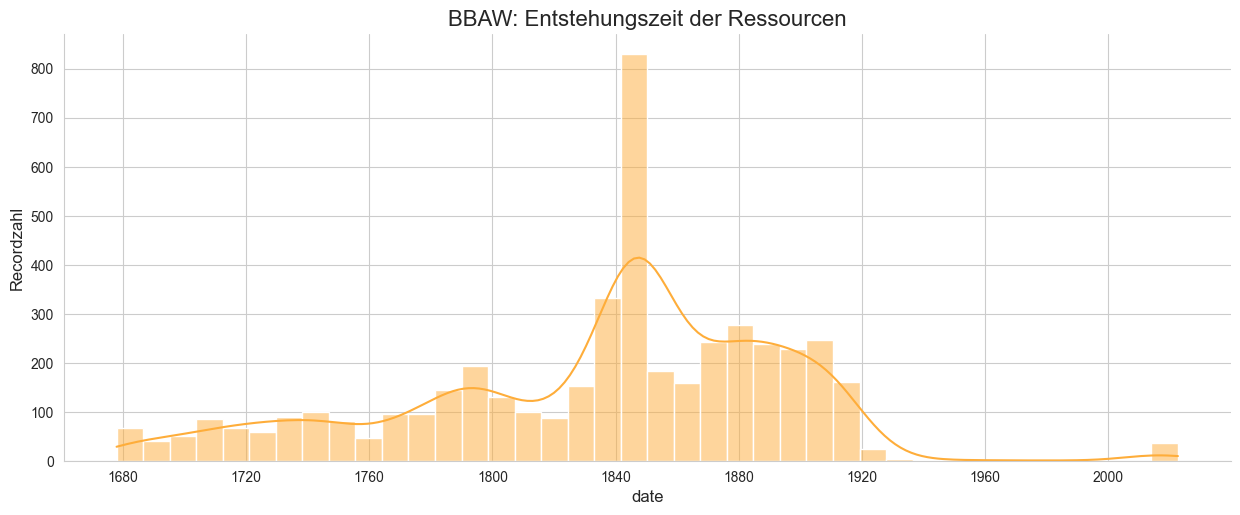

frühstes Datum: 1678-01-01 ; spätestes Datum: 2022-07-26


In [4]:
sns.set_style('whitegrid')  # seaborn-Design setzen

sns.displot(data_bbaw, x='date', bins=40, kde=True, color='#fead3a', aspect=2.5)  # Erscheinungszeitpunkt der Forschungsdaten in absoluten Zahlen


plt.title('BBAW: Entstehungszeit der Ressourcen', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Recordzahl', fontsize=12)
plt.savefig("BBAW_date.png", dpi=600, bbox_inches='tight')
plt.show()
print('frühstes Datum:', data_bbaw_grouped['date'].min().date(), '; spätestes Datum:', data_bbaw_grouped['date'].max().date())



### Verteilung der Publisher

[Zurück zum Anfang](#0)



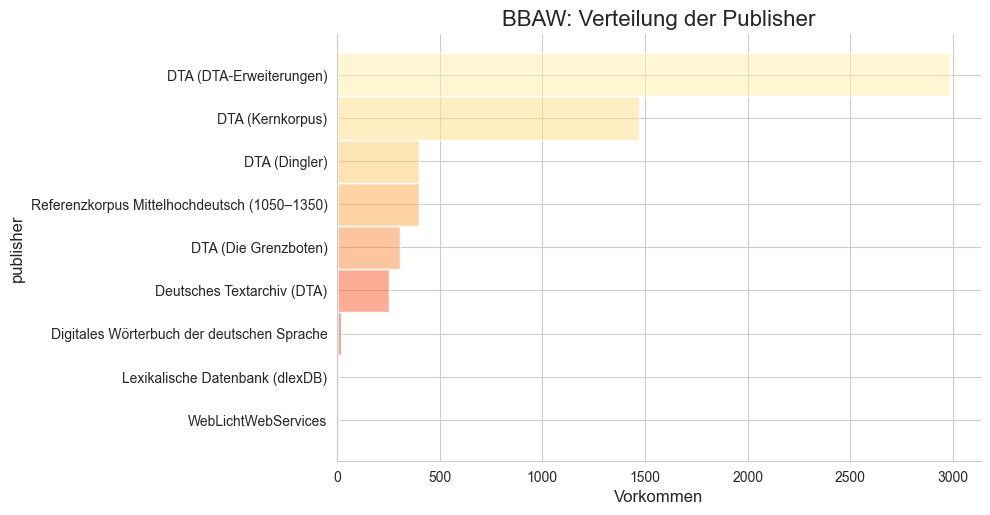

In [26]:
# Reihenfolge der Sprachen festlegen
order = data_bbaw['publisher'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_bbaw['publisher'] = pd.Categorical(data_bbaw['publisher'], categories=order, ordered=True)


sns.set_style('whitegrid')
sns.displot(data_bbaw, y = 'publisher', hue='publisher', palette="YlOrRd", aspect = 2, legend=False)


plt.title('BBAW: Verteilung der Publisher', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('publisher', fontsize=12)
plt.savefig("BBAW_Verteilung_publisher_hist.png", dpi=600, bbox_inches='tight')
plt.show()


### Verteilung der Lizenzangaben

[Zurück zum Anfang](#0)

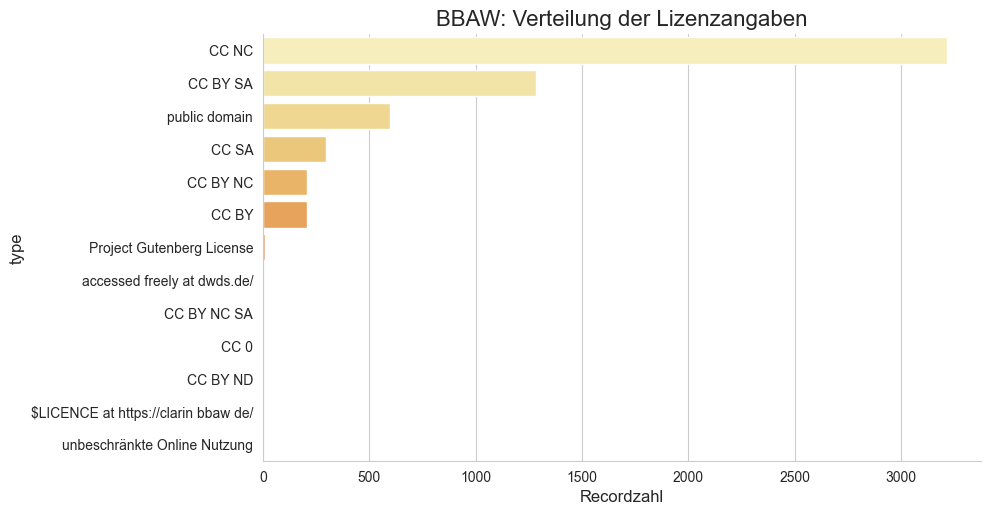

In [15]:
order = data_bbaw['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['rights'] = pd.Categorical(data_bbaw['rights'], categories=order, ordered=True)


sns.catplot(data_bbaw, y = 'rights', kind='count', aspect = 2, hue = 'rights', palette="YlOrRd", legend=False)

plt.title('BBAW: Verteilung der Lizenzangaben', fontsize=16)
plt.xlabel('Recordzahl', fontsize=12)
plt.ylabel('type', fontsize=12)
plt.show()

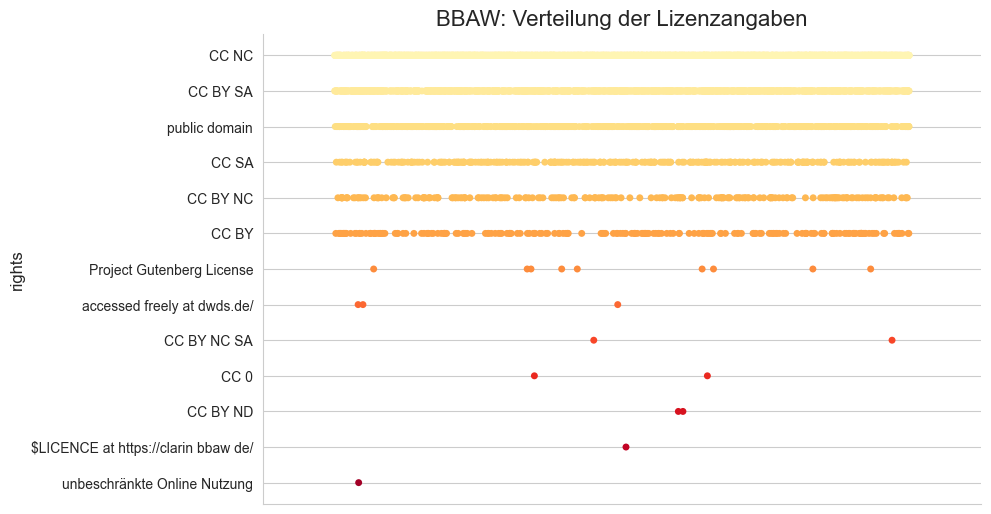

In [25]:
order = data_bbaw['rights'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['rights'] = pd.Categorical(data_bbaw['rights'], categories=order, ordered=True)


sns.catplot(data_bbaw, y = 'rights', aspect = 2, hue = 'rights', palette="YlOrRd", jitter=0.4, legend=False)

plt.title('BBAW: Verteilung der Lizenzangaben', fontsize=16)
plt.ylabel('rights', fontsize=12)
plt.savefig("BBAW_rights_scatter.png", dpi=600, bbox_inches='tight')
plt.show()


### Verteilung des Ressourcentyps

[Zurück zum Anfang](#0)

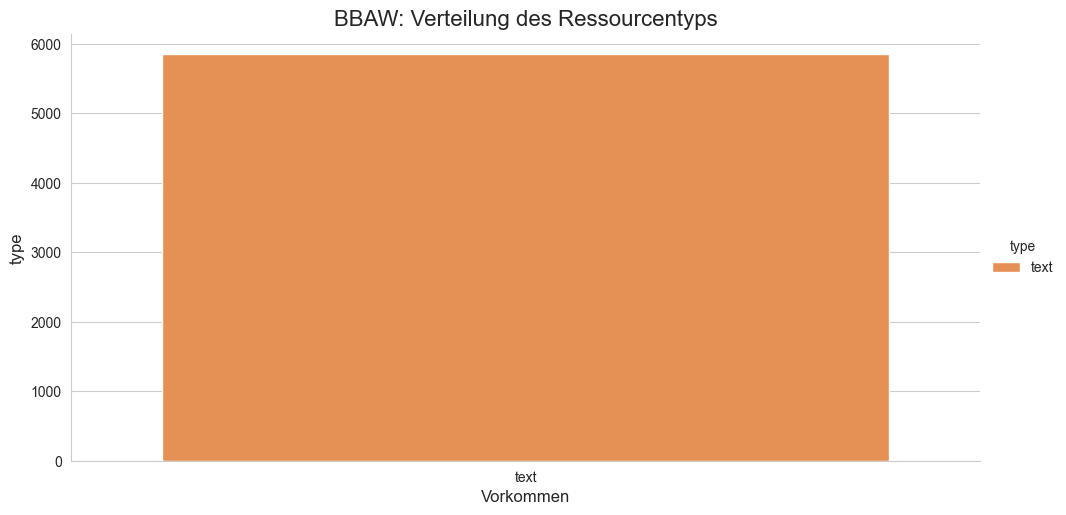

In [17]:
order = data_bbaw['type'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['type'] = pd.Categorical(data_bbaw['type'], categories=order, ordered=True)

sns.catplot(data_bbaw, x = 'type', kind = 'count', aspect =2, hue = 'type', palette='YlOrRd')

plt.title('BBAW: Verteilung des Ressourcentyps', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('type', fontsize=12)
plt.savefig("BBAW_type_hist.png", dpi=600, bbox_inches='tight')
plt.show()



### Verteilung des Ressourcenformats

[Zurück zum Anfang](#0)

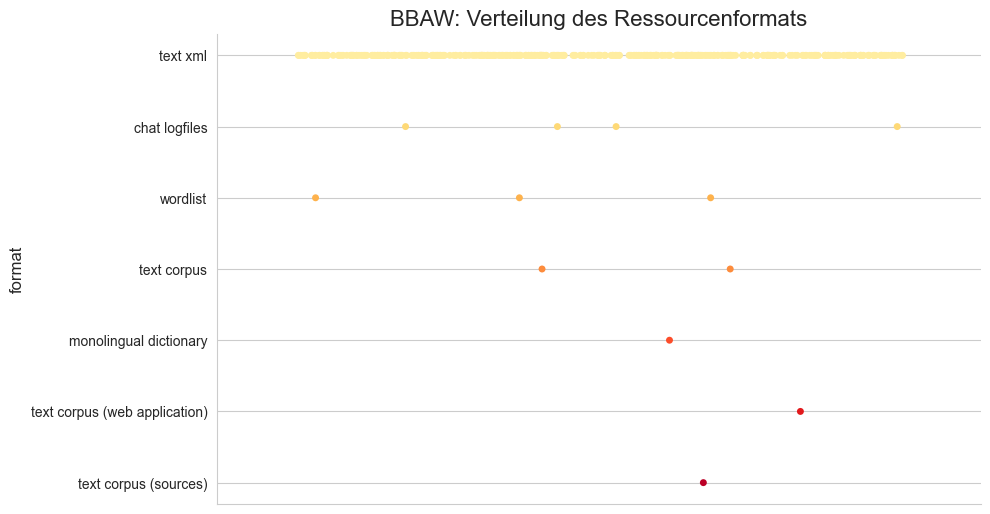

In [18]:
order = data_bbaw['format'].value_counts().index
# Convert the column to a categorical type with the calculated order
data_bbaw['format'] = pd.Categorical(data_bbaw['format'], categories=order, ordered=True)


sns.catplot(data_bbaw, y = 'format', aspect = 2, hue = 'format', palette="YlOrRd", jitter=0.4, legend=False)

plt.title('BBAW: Verteilung des Ressourcenformats', fontsize=16)
plt.ylabel('format', fontsize=12)
plt.savefig("BBAW_format_hist.png", dpi=600, bbox_inches='tight')
plt.show()

### Verteilung der Mitwirkenden

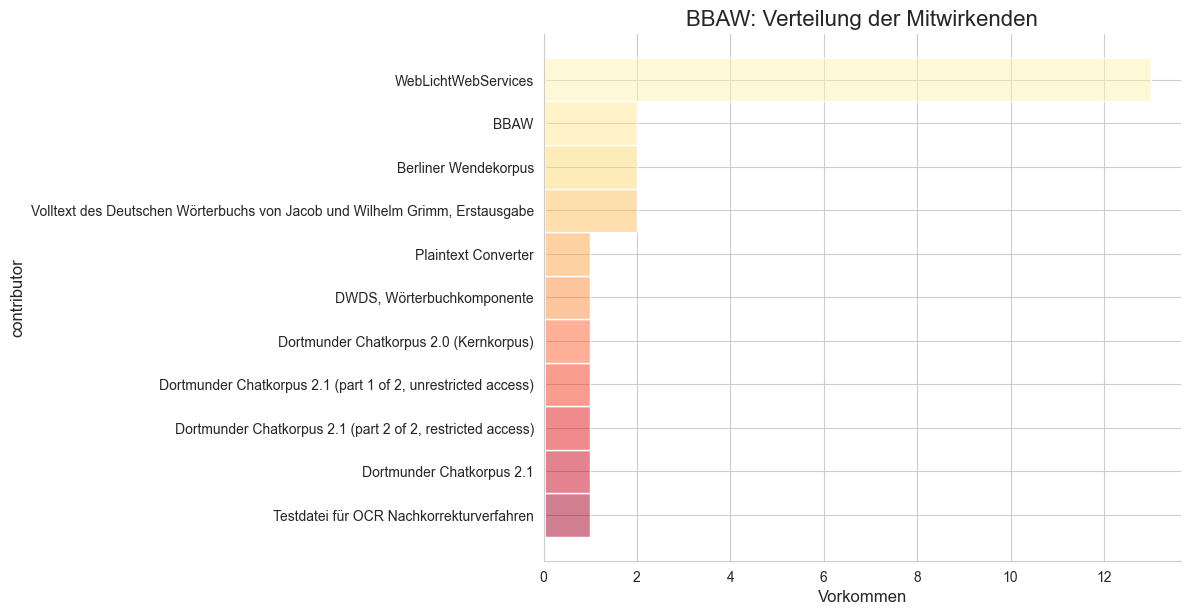

In [19]:
# Reihenfolge der Werte festlegen
order = data_bbaw['contributor'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_bbaw['contributor'] = pd.Categorical(data_bbaw['contributor'], categories=order, ordered=True)


sns.set_style('whitegrid')
sns.displot(data_bbaw, y = 'contributor', hue='contributor', palette="YlOrRd", height = 6, aspect =2, legend=False)



plt.title('BBAW: Verteilung der Mitwirkenden', fontsize=16)
plt.xlabel('Vorkommen', fontsize=12)
plt.ylabel('contributor', fontsize=12)
plt.savefig("BBAW_Verteilung_contributor_hist.png", dpi=600, bbox_inches='tight')
plt.show()

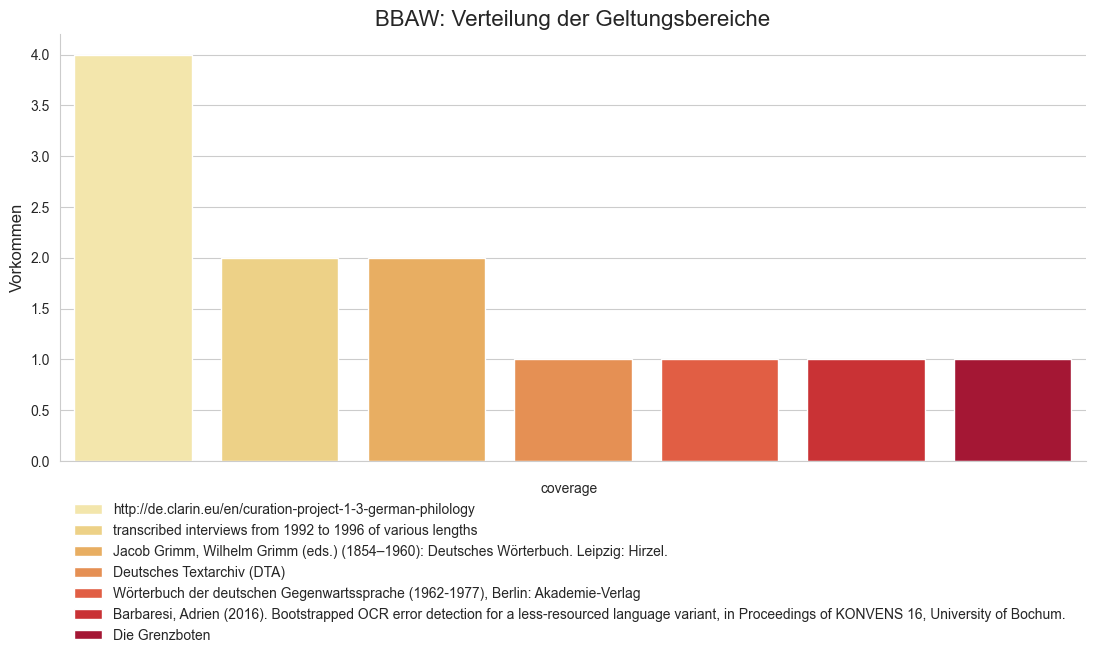

In [20]:
# Reihenfolge der Werte festlegen
order = data_bbaw['coverage'].value_counts().index 
# Konvertieren der Daten in kategorische Variablen
data_bbaw['coverage'] = pd.Categorical(data_bbaw['coverage'], categories=order, ordered=True)


sns.set_style('whitegrid')
g = sns.catplot(data_bbaw, x = 'coverage', kind='count', hue='coverage', palette="YlOrRd", aspect =2.5) 
sns.move_legend(g, "upper left", bbox_to_anchor=(0.09, 0.1), frameon=False) # Legende verschieben für bessere Lesbarkeit

plt.title('BBAW: Verteilung der Geltungsbereiche', fontsize=16)
plt.xticks([]) 
plt.xlabel('', fontsize=12)
plt.ylabel('Vorkommen', fontsize=12)
plt.savefig("BBAW_Verteilung_coverage_hist.png", dpi=600, bbox_inches='tight')
plt.show()


<a id="3"></a>
## 3. Word Clouds





### Häufige Titelbegriffe

[Zurück zum Anfang](#0)

{'vollständige digitalisierte': 1.0, 'digitalisierte Ausgabe': 1.0, 'Zeitung Organ': 0.10487444608567208, 'Ausgabe Neue': 0.09988921713441655, 'Neue Rheinische': 0.09785819793205318, 'Rheinische Zeitung': 0.09785819793205318, 'Demokratie vollständige': 0.09785819793205318, 'vnd': 0.08954948301329395, 'Band Jahrgang': 0.07385524372230429, 'Polytechnisches Journal': 0.07293205317577547, 'Journal Band': 0.06831610044313147, 'de': 0.05705317577548006, 'Ausgabe Jg': 0.056499261447562774, 'Jahrgang Polytechnisches': 0.045051698670605614, 'Ausgabe Allgemeine': 0.04431314623338257, 'Nr vollständige': 0.04265140324963072, 'Ausgabe Nr': 0.04098966026587888, 'Ausgabe Num': 0.03914327917282127, 'Allgemeine Zeitung': 0.03581979320531758, 'Zeitung Nr': 0.03581979320531758, 'Ausgabe Brief': 0.03508124076809453, 'Brief an': 0.03508124076809453, 'Jahrgang Dingler': 0.027511078286558344, 'mit': 0.025480059084194977, 'Band vollständige': 0.025480059084194977, 'Vierteljahr vollständige': 0.024926144756277

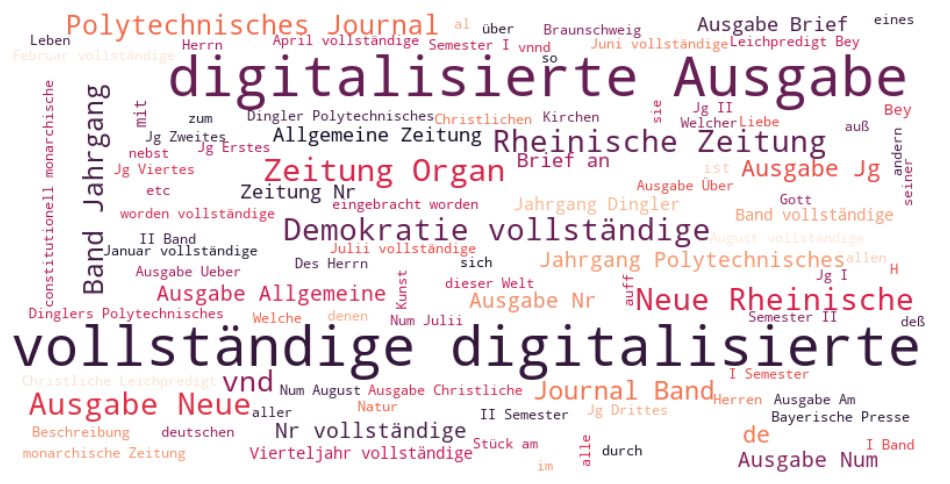

In [21]:

text_data = data_bbaw["title"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'in', 'aus', 'vor', 'nach']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rocket', max_words=100, stopwords = stopwords, collocations=True).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("BBAW_title_wordcloud.png", dpi=600, bbox_inches='tight')
plt.show() # Anzeige der Wordcloud



### Thema der Ressource

[Zurück zum Anfang](#0)

{'Gebrauchsliteratur': 1.0, 'Zeitung': 0.826944757609921, 'Wissenschaft': 0.822435174746336, 'Belletristik': 0.45659526493799324, 'Leichenpredigt': 0.18883878241262683, 'Zeitschrift': 0.1741826381059752, 'Religion': 0.161217587373168, 'Roman': 0.12232243517474634, 'Theologie': 0.12119503945885006, 'Brief': 0.11443066516347238, 'Lyrik': 0.09188275084554678, 'Gesellschaft': 0.08680947012401354, 'Poesie': 0.0834272829763247, 'Novelle': 0.07102593010146561, 'Gelegenheitsschrift': 0.06820744081172492, 'Tod': 0.0665163472378805, 'Drama': 0.05918827508455468, 'Prosa': 0.05636978579481398, 'Philosophie': 0.052423900789177004, 'Recht': 0.04114994363021421, 'Geographie': 0.03889515219842165, 'Biologie': 0.036076662908680945, 'Sonstiges': 0.03156708004509583, 'Historiographie': 0.02987598647125141, 'Medizin': 0.02874859075535513, 'Jura': 0.02818489289740699, 'Reiseliteratur': 0.02705749718151071, 'Naturwissenschaft': 0.02593010146561443, 'Physik': 0.02536640360766629, 'Kunstgeschichte': 0.0236753

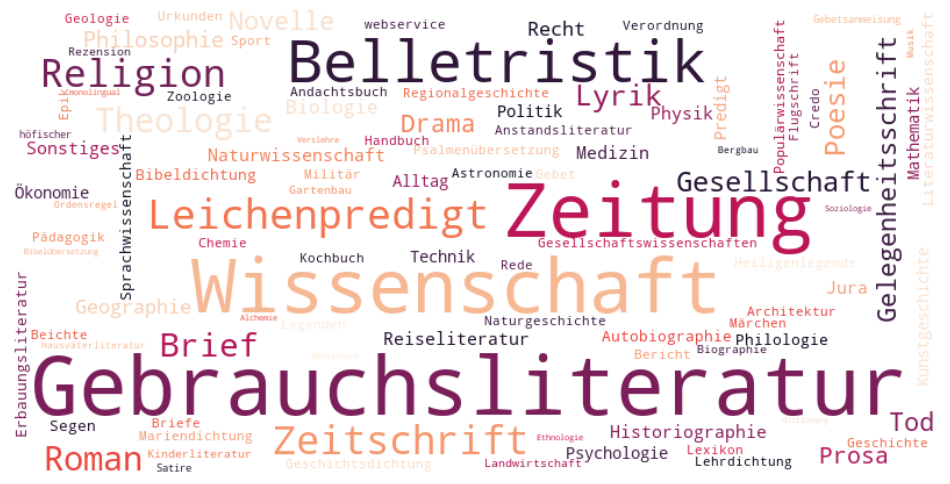

In [22]:

text_data = data_bbaw["subject"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum', 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 'von', 'zu', 'in', 'aus', 'vor', 'nach']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='rocket_r', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud ohne collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("BBAW_wordcloud_subject.png", dpi=600, bbox_inches='tight')
plt.show() # Anzeige der Wordcloud


### Urheber*innen

[Zurück zum Anfang](#0)

{'Johann': 1.0, 'Dingler': 0.4471299093655589, 'Friedrich': 0.3867069486404834, 'Gottfried': 0.3564954682779456, 'Daniel': 0.3081570996978852, 'Alexander': 0.2854984894259819, 'Humboldt': 0.2824773413897281, 'Sander': 0.2628398791540785, 'Emil': 0.20996978851963746, 'Maximilian': 0.20996978851963746, 'Heinrich': 0.20996978851963746, 'Simon': 0.17371601208459214, 'Christian': 0.17220543806646527, 'Dach': 0.1691842900302115, 'N': 0.16314199395770393, 'Georg': 0.15861027190332327, 'Wilhelm': 0.1510574018126888, 'Karl': 0.13897280966767372, 'Ferdinand': 0.13293051359516617, 'August': 0.12235649546827794, 'Fischer': 0.11933534743202417, 'Zemann': 0.11782477341389729, 'Ludwig': 0.10876132930513595, 'Jacob': 0.10120845921450151, 'A': 0.0891238670694864, 'Paul': 0.08308157099697885, 'Carl': 0.08157099697885196, 'Theodor': 0.08157099697885196, 'Christoph': 0.08006042296072508, 'Franz': 0.0770392749244713, 'Joachim': 0.0755287009063444, 'Johannes': 0.0755287009063444, 'H': 0.07099697885196375, '

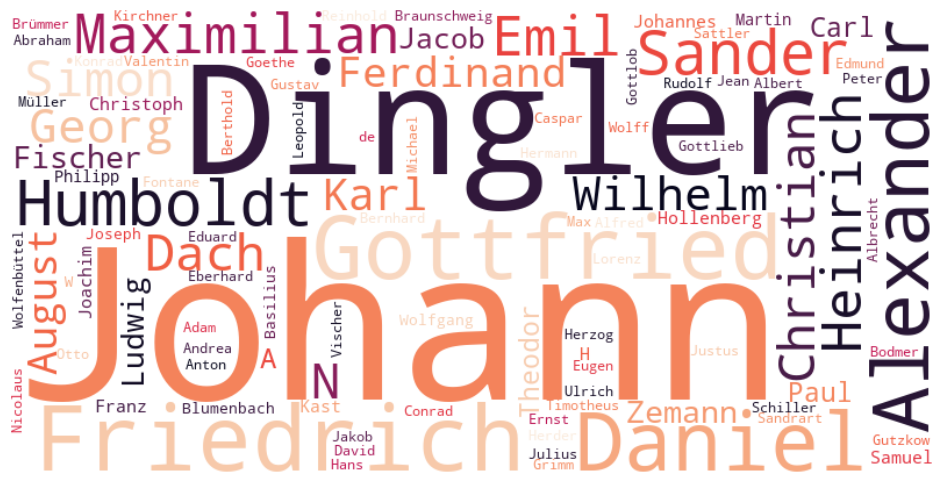

In [23]:

text_data = data_bbaw["creator"].str.cat(sep=' ') # Werte werden als string zusammengefügt
stopwords = set(['der', 'die', 'das', 'wer', 'wie', 'was', 'wieso', 'weshalb', 'warum',
 'den', 'dem', 'ein', 'eine', 'einer', 'einen', 'einem', 'oder', 'und', 'auch', 'auf', 
 'von', 'zu', 'in', 'aus', 'vor', 'nach']) # Stopwortliste
 
wordcloud = WordCloud(width=800, height=400, background_color='white', 
colormap='rocket', max_words=100, stopwords = stopwords, collocations=False).generate(text_data) # Erstellung der Wordcloud mit collocations
print(wordcloud.words_) # Ausgabe der Wörter und ihrer Häufigkeit

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig("BBAW_Wordcloud_creator.png", dpi=600, bbox_inches='tight')
plt.show() # Anzeige der Wordcloud